# Testes de Hipóteses

In [25]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
#import altair as alt
import re
#from vega_datasets import data
import seaborn as sns
sns.set()

In [26]:
# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [33]:
# Load gun violence dataset and gun laws dataset
gun_violence = pd.read_csv('../databases/gun_violence_clean.zip', compression='zip')
gun_law = pd.read_csv('../databases/gun_laws.zip', compression='zip')
population = pd.read_csv('../databases/population.zip', compression='zip')

## Teste 1

Hipotese nula: dado que o Estado apresenta um maior número de leis que dizem respeito ao controle de porte de armas, ele apresentaria uma porcentagem de incidentes menor do que estados de menos leis.

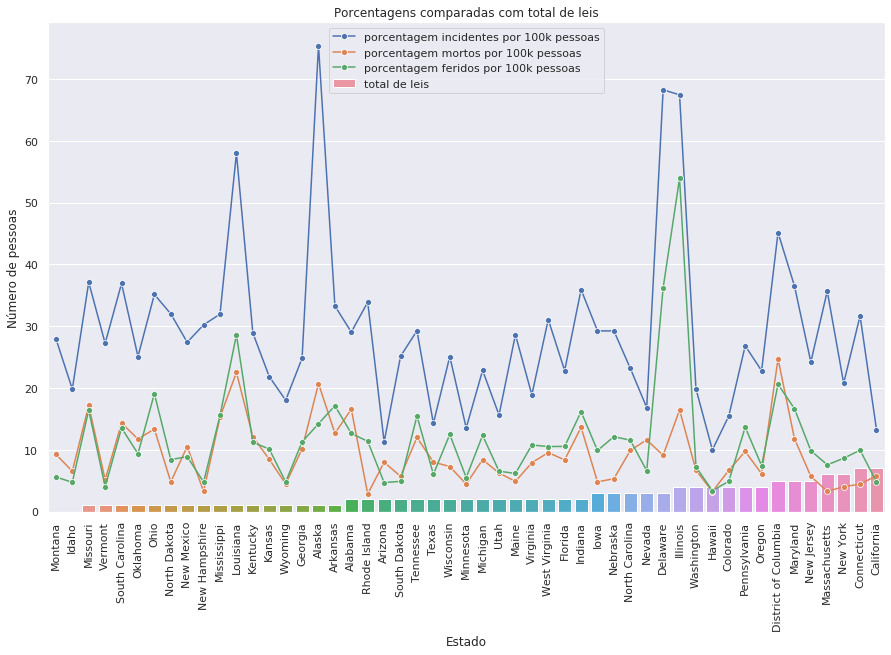

In [43]:
gun_violence = gun_violence[['incident_id', 'state', 'n_killed', 'n_injured', 'year', 'month', 'day']]
gun_violence = gun_violence[~gun_violence['year'].isin(['2013', '2018'])]
glaw = gun_law.iloc[:, 1:]
population = population[['2014', '2015', '2016', '2017']]

pop = population.reset_index().drop('index', axis=1)

incidents_state = gun_violence.groupby('state')\
                  .agg({'n_injured':'sum', 'incident_id':'count', 'n_killed':'sum'})\
                  .rename(columns={'incident_id':'number_of_incidents'})\
                  .sort_values('state')\
                  .reset_index()
# Join the dataframes
states = pd.concat([incidents_state, pop, glaw], axis=1, sort=False, join='inner')
# Population mean 
states['mean_pop'] = ((states['2014'] + states['2015'] + states['2016'] +states['2017'])/4)
# Porcents per 100k people
states['porcent_killed'] = (states['n_killed']/ states['mean_pop']) * 100000
states['porcent_incidents'] = (states['number_of_incidents']/ states['mean_pop']) * 100000
states['porcent_injured'] = (states['n_injured']/ states['mean_pop']) * 100000
# Column counting the number of laws a state has adopted
states['total_leis'] = (states.iloc[:, 8:15].sum(axis=1))

#Plot cordering by total_leis
states = states.sort_values(['total_leis'])
sns.lineplot(x='state', y='porcent_incidents', marker='o',
                     data=states, label='porcentagem incidentes por 100k pessoas', sort=False)
sns.lineplot(x='state', y='porcent_killed', marker='o',
                     data=states, label='porcentagem mortos por 100k pessoas', sort=False)
sns.lineplot(x='state', y='porcent_injured', marker='o',
                     data=states, label='porcentagem feridos por 100k pessoas', sort=False)
sns.barplot(x='state', y='total_leis',
                     data=states, label='total de leis')
# Título do plot
plt.title("Porcentagens comparadas com total de leis")
# Nome do eixo x
plt.xlabel('Estado')
# Nome do eixo y
plt.ylabel('Número de pessoas')
# Rotaciona nomes no eixo x
plt.xticks(rotation=90)
plt.legend()
plt.show()

Como observado no gráfico, não existe uma relação direta entre o número de leis presentesHipotese nula falsa.

## Teste 2